# Simulating a real-world phenomenon
***

### Table of contents

#### 1. Introduction

#### 2. Variables

#### 3. Analysis

#### 4. Conclusion

#### 5. References

<br>

### 1. Introduction
***
Synthetic data is information that is artificially manufactured rather than generated by real-world events. Synthetic data is created algorithmically, and is used as a stand-in for test data sets of production or operational data, to validate models and, increasingly, to train machine learning models. It can be numerical, binary or categorical, and should preferably be random.

The data set will be created using the ```numpy.random``` package, which is used to generate random numbers and random sampling. The real-world phenomenon simulated below is a fitness tracker. As everyone has different goals, this example specifically simulates the weight loss progress of an overweight male over the course of a calendar year from 01/01/20 to 31/12/20. As I have a personal trainer, I will use some of the variables typically used to track my progress. Every day I have to submit a check-in spreadsheet.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Apply plot style
plt.style.use("ggplot")

# Set the seed for reproducible results
np.random.seed(100)

In [2]:
height_m = 180
weight_kg = 90

### 2. Variables
***
The following variables will be used in the data set:

1. Date
2. Day
3. Weight (kg)
4. Resting Heart Rate (bpm)
5. Fasting Blood Glucose (mmol/L)
6. Exercise
7. Calorie Intake
8. Calorie Output
9. Calorie Difference
10. Total Daily Energy Expenditure
11. Weight
12. Body Mass Index

#### Date/Day

The ```pandas.date_range()``` function is one of the general functions in Pandas used to return a fixed frequency DateTimeIndex. (https://www.w3resource.com/pandas/date_range.php) As stats will be recorded every day, the *freq* parameter is set to *D*. To create a column with the day, the ```pandas.Series.dt.day_name()``` function returns the day names of the DateTimeIndex. (https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_name.html) The ```DataFrame.head()``` function is used to return the first 10 rows of the DataFrame. 

In [3]:
# Define start and end date
date = pd.date_range("2020-01-01", "2020-12-31", freq="D")
# Create the Date and Day columns
df = pd.DataFrame({"Date": date})
df["Day"] = df["Date"].dt.day_name()
# Change the data type from object to categorical
df["Day"] = df["Day"].astype("category")

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day
0,2020-01-01,Wednesday
1,2020-01-02,Thursday
2,2020-01-03,Friday
3,2020-01-04,Saturday
4,2020-01-05,Sunday
5,2020-01-06,Monday
6,2020-01-07,Tuesday
7,2020-01-08,Wednesday
8,2020-01-09,Thursday
9,2020-01-10,Friday


#### Activity

The next step is to define the list of workouts based on the workout programme provided to this particular client. The programme requires four days of strength training, two days of cardio and one rest day. While there is flexibility in terms of what day each workout occurs on, this particular client prefers to undertake strength training from Monday-Thursday and cardio/rest from Friday-Sunday. 

In [4]:
# Define list of workouts
workouts = ["Rest", "Cardio", "Legs", "Chest", "Delts", "Arms"]

# Separate the days of the week
mon = df["Day"] == "Monday"
tue = df["Day"] == "Tuesday"
wed = df["Day"] == "Wednesday"
thu = df["Day"] == "Thursday"
fri = df["Day"] == "Friday"
sat = df["Day"] == "Saturday"
sun = df["Day"] == "Sunday"

# Define probabilities for each day
prob_mon = np.random.choice(workouts, p=[0, 0, 0.25, 0.25, 0.25, 0.25])
prob_tue = np.random.choice(workouts, p=[0, 0, 0.25, 0.25, 0.25, 0.25])
prob_wed = np.random.choice(workouts, p=[0, 0, 0.25, 0.25, 0.25, 0.25])
prob_thu = np.random.choice(workouts, p=[0, 0, 0.25, 0.25, 0.25, 0.25])
prob_fri = np.random.choice(workouts, p=[0.5, 0.5, 0, 0, 0, 0])
prob_sat = np.random.choice(workouts, p=[0.5, 0.5, 0, 0, 0, 0])
prob_sun = np.random.choice(workouts, p=[0.5, 0.5, 0, 0, 0, 0])

# Create the Workout column
df["Workout"] = np.select([mon, tue, wed, thu, fri, sat, sun], [prob_mon, prob_tue, prob_wed, prob_thu, prob_fri, prob_sat, prob_sun], default=np.nan)
df["Workout"] = df["Workout"].astype("category")

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout
0,2020-01-01,Wednesday,Chest
1,2020-01-02,Thursday,Arms
2,2020-01-03,Friday,Rest
3,2020-01-04,Saturday,Rest
4,2020-01-05,Sunday,Cardio
5,2020-01-06,Monday,Delts
6,2020-01-07,Tuesday,Chest
7,2020-01-08,Wednesday,Chest
8,2020-01-09,Thursday,Arms
9,2020-01-10,Friday,Rest


#### Calories Burned

To simulate the number of calories burned by each workout, the client's weight is multiplied by the Metabolic Equivalent (MET), which returns an approximation of the number of calories burned during one hour of that particular activity. (https://sites.google.com/site/compendiumofphysicalactivities/) According to this method, the MET for each activity is listed below. 

- Cardio (jogging, general) = 7.0 
- Legs (resistance (weight) training, squats, slow or explosive effort) = 5.0
- Chest/Delts/Arms (resistance (weight) training, multiple exercises, 8-15 repetitions at varied resistance) = 3.5

In [5]:
# Calculate the calories burned by multiplying the start weight by the MET value
cal_rest = weight_kg
cal_cardio = weight_kg * 7.0
cal_legs = weight_kg * 5.0
cal_chest = weight_kg * 3.5
cal_delts = weight_kg * 3.5
cal_arms = weight_kg * 3.5

A function is then defined to pull a random value from a uniform distribution using the ```random.uniform()``` function depending on each workout.

In [6]:
# Define function to estimate the calories burned by each workout
def cals_burned(row):
    if row["Workout"] == "Rest": return 0
    if row["Workout"] == "Cardio": return int(np.random.uniform(cal_cardio/2, cal_cardio))
    if row["Workout"] == "Legs": return int(np.random.uniform(cal_legs/2, cal_legs))
    if row["Workout"] == "Chest": return int(np.random.uniform(cal_chest/2, cal_chest))
    if row["Workout"] == "Delts": return int(np.random.uniform(cal_delts/2, cal_delts))
    if row["Workout"] == "Arms": return int(np.random.uniform(cal_arms/2, cal_arms))

# Create the Burned column
df["Burned"] = df.apply(lambda row: cals_burned(row), axis= 1)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned
0,2020-01-01,Wednesday,Chest,287
1,2020-01-02,Thursday,Arms,179
2,2020-01-03,Friday,Rest,0
3,2020-01-04,Saturday,Rest,0
4,2020-01-05,Sunday,Cardio,496
5,2020-01-06,Monday,Delts,297
6,2020-01-07,Tuesday,Chest,190
7,2020-01-08,Wednesday,Chest,186
8,2020-01-09,Thursday,Arms,174
9,2020-01-10,Friday,Rest,0


#### Body Mass Index (BMI)

Body Mass Index (BMI) is a guidline used to determine if a person is underweight, an optimal weight, overweight or obese based on their height and weight. The formula to determine BMI is kg/m<SUP>2</SUP> and the result categorises a person as follows:

![BMI](bmi.png)

The code below calculates this client's BMI, which in this case is 27.78. This puts the client in the "Overweight" category.

In [7]:
# Define function to calculate BMI
def bmi(weight, height):
    bmi = weight/(height/100)**2
    return bmi

# Calculate the client's BMI using the client's height and weight
starting_bmi = bmi(weight_kg, height_m)

# Print the BMI
print(round(starting_bmi, 2) )

27.78


#### Total Daily Energy Expenditure (TDEE)

TDEE is a person's estimated energy expenditure when daily activity is taken into account.

![TDEE](tdee.png)

The Basal Metabolic Rate (BMR) is a person's estimated energy expenditure over the course of a day when they are at rest. It is determined by the person's weight, height, age, and sex. The code below calculates this client's BMI.

In [8]:
# Define variables to determined BMR
age, male, female = 35, 5, -161

# Define a function to calculate BMR
def bmr(weight, height, age, sex):
    bmr = 10 * weight + 6.25 * height - 5 * age + sex
    return bmr

# Calculate starting BMR
starting_bmr = bmr(weight_kg, height_m, age, male)

# Print the BMR
print(round(starting_bmr))

1855


This is then used below to calculate the TDEE. This particular client considers themselves to be sedentary with little or no exercise. Therefore, the BMR is multiplied by 1.2.

In [9]:
# Define a function to calculate TDEE
def tdee(weight, height):
    tdee = bmr(weight, height, age, male) * 1.2
    return tdee
         
# Calculating and displaying starting TDEE
starting_tdee = tdee(weight_kg, height_m)
print(round(starting_tdee), 2)

# Create the TDEE column and populate the first row
df["TDEE"] = np.nan
df.loc[0, "TDEE"] = starting_tdee

# Print the first 10 rows of the DataFrame
df.head(n=10)

2226 2


,Date,Day,Workout,Burned,TDEE
0,2020-01-01,Wednesday,Chest,287,2226.0
1,2020-01-02,Thursday,Arms,179,NaN
2,2020-01-03,Friday,Rest,0,NaN
3,2020-01-04,Saturday,Rest,0,NaN
4,2020-01-05,Sunday,Cardio,496,NaN
5,2020-01-06,Monday,Delts,297,NaN
6,2020-01-07,Tuesday,Chest,190,NaN
7,2020-01-08,Wednesday,Chest,186,NaN
8,2020-01-09,Thursday,Arms,174,NaN
9,2020-01-10,Friday,Rest,0,NaN


#### Define Weight Targets

Before the beginning of the training programme, it was agreed that the total target weight loss would be 15kg in order to bring the client's BMI into the "Normal" category. 

In [10]:
# Set the target weight loss
target_total = 15
target_weekly = target_total/52

# Estimate number of kilograms per calorie based on 3500cal = 0.454kg
kg_per_cal = 0.454/3500 

# Define a function to convert calories to kilograms 
def cal_to_kg(calories):
    kg = calories * kg_per_cal
    return kg

# Weekly and daily calorie deficits.
weekly_cal_deficit = 2000
daily_cal_deficit = weekly_cal_deficit/7

print("Target weekly weight loss:", round(target_weekly, 2), "kg")
print("Estimated weekly weight loss:", round(cal_to_kg(weekly_cal_deficit), 2), "kg")
print("Daily calorie deficit:", round(daily_cal_deficit))
print("Daily calorie allowance:", round(starting_tdee - daily_cal_deficit))

Target weekly weight loss: 0.29 kg
Estimated weekly weight loss: 0.26 kg
Daily calorie deficit: 286
Daily calorie allowance: 1940


#### Calorie Intake

Working with 1940 calories as the average, and allowing for a 10% variance in calorie amounts, a truncated normal distribution would be suitable as it allows for upper and lower limits to be set. 

In [11]:
def cal_intake():
    low = 1500
    high = 2500
    average = 1940
    std_dev = 165
    x = stats.truncnorm((low - average) / std_dev, (high - average) / std_dev, loc=average, scale=std_dev)
    cal_val = x.rvs(366).astype(int)
    return cal_val

cal_intake = cal_intake()
print(cal_intake)

[2084 2240 2067 1824 2123 2083 1693 1820 1977 1762 2016 2336 1847 2057
 1668 1869 2202 1998 1983 2181 1791 1606 1797 1949 1939 2079 2118 1810
 1914 1908 1681 1576 2073 1842 2035 1908 1766 1798 1861 2082 1587 1672
 1968 2020 2039 1932 1885 2104 1921 1864 1724 1688 1723 2018 2017 1826
 1999 1699 2128 1740 1783 1927 2065 2114 1808 1708 2072 1960 2071 2171
 1932 1924 1981 1982 1942 1857 1957 2177 2251 1897 2078 1997 1819 1676
 1634 1751 1814 2097 1847 2068 1942 1763 2066 2173 2200 2029 2024 1959
 1885 2286 1695 2149 1837 1971 1946 1963 2002 1794 1841 1770 1638 2195
 1876 1740 1889 1892 2010 1827 2009 1730 1974 1737 1960 1948 1852 1922
 1655 1981 1506 1941 1941 1689 2210 1986 2013 1925 2028 1791 2003 1968
 2217 2077 1976 1922 2045 2086 2180 2095 1638 2063 1949 2138 1923 1957
 2159 1963 1795 2018 1592 1890 2084 1972 1772 1868 2214 1639 2066 1791
 1810 2005 1767 1891 1901 2008 1945 1933 1950 2082 2081 1769 2346 1698
 2370 1751 1690 2028 2230 2032 2009 1759 1791 1775 1722 2254 1944 1920
 1868 

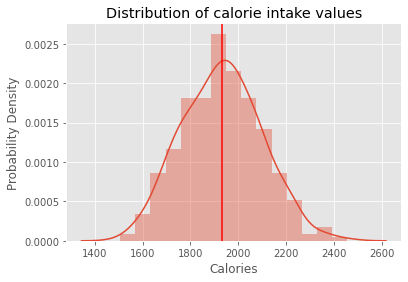

In [12]:
# Plot the distribution of calorie intake values
sns.distplot(cal_intake)
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title('Distribution of calorie intake values'), 
# Draw red line to show the mean value
plt.axvline(np.mean(cal_intake), color="red")
plt.show()

In this programme, it is advised that less calories are consumed on rest/cardio days (between 200 and 300 calories less than training days).

In [13]:
# Create a variable with calorie a
less_cals = np.random.uniform(200, 300)
df["Input"] = np.where((((df["Workout"])=="Rest") | ((df["Workout"])=="Cardio")), cal_intake - int(less_cals), cal_intake)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input
0,2020-01-01,Wednesday,Chest,287,2226.0,2084
1,2020-01-02,Thursday,Arms,179,NaN,2240
2,2020-01-03,Friday,Rest,0,NaN,1782
3,2020-01-04,Saturday,Rest,0,NaN,1539
4,2020-01-05,Sunday,Cardio,496,NaN,1838
5,2020-01-06,Monday,Delts,297,NaN,2083
6,2020-01-07,Tuesday,Chest,190,NaN,1693
7,2020-01-08,Wednesday,Chest,186,NaN,1820
8,2020-01-09,Thursday,Arms,174,NaN,1977
9,2020-01-10,Friday,Rest,0,NaN,1477


#### Calorie Output

The calorie output is calculated by adding the TDEE and Burned columns. Only the first row will be filled.

In [14]:
# Create the Cals Out column and populate the first row
df["Output"] = np.nan
df.loc[0, "Output"] = df.loc[0, "TDEE"] + df.loc[0, "Burned"]

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN


#### Weight

To find the difference between calorie intake and output

In [15]:
# Create the Difference column
df["Difference"] = np.nan
df.loc[0, "Difference"] = df.loc[0, "Input"] - df.loc[0, "Output"]

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN


In [16]:
# Create the Gain/Loss column
df["Loss"] = np.nan
df.loc[0, "Loss"] = round(cal_to_kg(df.loc[0, "Difference"]) + (np.random.choice((-1, 1)) * np.random.normal(0.04, 0.01)), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN


In [17]:
# Creating the weight column.
df["Weight"] = np.nan
df.loc[0, "Weight"] = round(weight_kg + df.loc[0, "Loss"], 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN


#### BMI

In [18]:
# Creating BMI column.
df["BMI"] = np.nan
df.loc[0, "BMI"] = round(bmi(df.loc[0, "Weight"], height_m), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN


#### RHR

In [19]:
# Normal range 60-100
# started at 70
# go from 70 down to 62
rhr = np.round(np.linspace(70, 62, 366), 2) + np.round(np.random.normal(0, 1, 366), 2)
print(rhr)

[68.32 70.38 70.05 70.05 70.79 68.81 69.75 69.62 69.99 69.83 68.13 69.58
 70.69 69.92 68.88 69.73 67.6  70.85 68.57 68.77 68.82 69.16 69.13 69.72
 69.94 69.55 69.15 70.36 68.97 69.11 68.35 70.7  68.52 69.12 70.58 69.28
 69.36 69.33 69.27 69.58 69.07 69.92 70.27 69.9  70.36 68.3  66.3  68.68
 68.31 68.9  69.   68.16 68.96 70.21 70.06 68.85 68.63 67.74 68.23 68.22
 68.69 67.92 68.43 70.33 69.13 68.69 70.07 67.84 69.43 67.84 69.44 69.65
 70.24 66.45 69.14 67.53 69.13 70.27 66.29 69.31 68.3  66.49 69.06 67.62
 66.75 68.66 70.03 69.16 68.5  69.05 69.71 67.87 66.95 68.7  68.23 68.35
 67.88 68.85 68.14 68.   69.34 67.49 67.41 67.67 66.82 68.17 67.81 70.19
 66.91 66.7  66.97 65.99 68.08 66.66 67.28 69.47 68.57 68.97 67.96 67.51
 66.87 67.21 68.25 67.8  68.7  68.17 67.11 65.33 67.46 66.59 67.93 67.11
 67.17 67.99 67.68 66.84 67.8  65.94 67.28 67.91 66.4  68.34 65.39 65.85
 66.91 65.83 66.23 66.87 67.24 66.47 67.78 67.39 66.67 67.13 65.6  66.47
 67.67 66.87 65.9  68.48 64.81 66.04 66.11 65.25 68

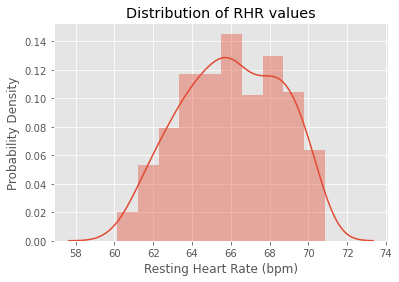

In [20]:
# Plot the distribution of RHR values
sns.distplot(rhr)
plt.xlabel("Resting Heart Rate (bpm)"), plt.ylabel("Probability Density"), plt.title('Distribution of RHR values'), 
plt.show()

In [21]:
df["RHR"] = rhr

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75,68.32
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN,70.38
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN,70.05
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN,70.05
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN,70.79
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN,68.81
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN,69.75
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN,69.62
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN,69.99
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN,69.83


#### FBG

5.0 and 5.5 is the optimal https://stackoverflow.com/questions/14058340/adding-noise-to-a-signal-in-python

In [22]:
fbg = np.round(np.linspace(5.8, 5.2, 366), 2) + np.round(np.random.normal(0, 0.1, 366), 2)

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75,68.32
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN,70.38
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN,70.05
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN,70.05
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN,70.79
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN,68.81
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN,69.75
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN,69.62
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN,69.99
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN,69.83


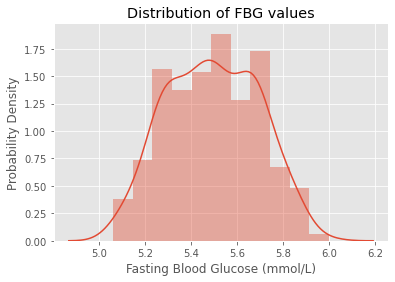

In [23]:
# Plot the distribution of RHR values
sns.distplot(fbg)
plt.xlabel("Fasting Blood Glucose (mmol/L)"), plt.ylabel("Probability Density"), plt.title('Distribution of FBG values'), 
plt.show()

In [24]:
df["FBG"] = fbg

# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR,FBG
0,2020-01-01,Wednesday,Chest,287,2226.0,2084,2513.0,-429.0,-0.1,89.9,27.75,68.32,5.85
1,2020-01-02,Thursday,Arms,179,NaN,2240,NaN,NaN,NaN,NaN,NaN,70.38,5.86
2,2020-01-03,Friday,Rest,0,NaN,1782,NaN,NaN,NaN,NaN,NaN,70.05,5.85
3,2020-01-04,Saturday,Rest,0,NaN,1539,NaN,NaN,NaN,NaN,NaN,70.05,5.80
4,2020-01-05,Sunday,Cardio,496,NaN,1838,NaN,NaN,NaN,NaN,NaN,70.79,5.74
5,2020-01-06,Monday,Delts,297,NaN,2083,NaN,NaN,NaN,NaN,NaN,68.81,5.89
6,2020-01-07,Tuesday,Chest,190,NaN,1693,NaN,NaN,NaN,NaN,NaN,69.75,5.77
7,2020-01-08,Wednesday,Chest,186,NaN,1820,NaN,NaN,NaN,NaN,NaN,69.62,5.86
8,2020-01-09,Thursday,Arms,174,NaN,1977,NaN,NaN,NaN,NaN,NaN,69.99,5.84
9,2020-01-10,Friday,Rest,0,NaN,1477,NaN,NaN,NaN,NaN,NaN,69.83,5.90


#### Populating the Data Set

In [25]:
# For loop to fill in missing values, starting from the second row.
for i in range(1, len(df)):    
    # tdee depends on the weight of the previous day.
    df.loc[i, "TDEE"] = tdee(df.loc[i-1, "Weight"], height_m)    
    # cals_out is the addition of tdee + exercise_cals.
    df.loc[i, "Output"] = df.loc[i, "TDEE"] + df.loc[i, "Burned"]     
    # cal_dif is the subtraction of cals_out from cals_in.
    df.loc[i, "Difference"] = round(df.loc[i, "Input"] - df.loc[i, "Output"], 2)    
    # gain_or_loss is the conversion of cals_out to weight plus a random variant.
    df.loc[i, "Loss"] = round(cal_to_kg(df.loc[i, "Difference"]) + (np.random.choice((-1, 1)) * np.random.normal(0.04, 0.01)), 2)    
    # weight is the subtraction of gain_or_loss from the previous day's weight.
    df.loc[i, "Weight"] = round(df.loc[i-1, "Weight"] + df.loc[i, "Loss"], 2) 
    # bmi is the conversion of weight to a BMI score.
    df.loc[i, "BMI"] = round(bmi(df.loc[i, "Weight"], height_m), 2)
    
# Print the first 10 rows of the DataFrame
df.head(n=10)

,Date,Day,Workout,Burned,TDEE,Input,Output,Difference,Loss,Weight,BMI,RHR,FBG
0,2020-01-01,Wednesday,Chest,287,2226.00,2084,2513.00,-429.00,-0.10,89.90,27.75,68.32,5.85
1,2020-01-02,Thursday,Arms,179,2224.80,2240,2403.80,-163.80,0.02,89.92,27.75,70.38,5.86
2,2020-01-03,Friday,Rest,0,2225.04,1782,2225.04,-443.04,-0.11,89.81,27.72,70.05,5.85
3,2020-01-04,Saturday,Rest,0,2223.72,1539,2223.72,-684.72,-0.11,89.70,27.69,70.05,5.80
4,2020-01-05,Sunday,Cardio,496,2222.40,1838,2718.40,-880.40,-0.04,89.66,27.67,70.79,5.74
5,2020-01-06,Monday,Delts,297,2221.92,2083,2518.92,-435.92,-0.04,89.62,27.66,68.81,5.89
6,2020-01-07,Tuesday,Chest,190,2221.44,1693,2411.44,-718.44,-0.06,89.56,27.64,69.75,5.77
7,2020-01-08,Wednesday,Chest,186,2220.72,1820,2406.72,-586.72,-0.03,89.53,27.63,69.62,5.86
8,2020-01-09,Thursday,Arms,174,2220.36,1977,2394.36,-417.36,-0.02,89.51,27.63,69.99,5.84
9,2020-01-10,Friday,Rest,0,2220.12,1477,2220.12,-743.12,-0.06,89.45,27.61,69.83,5.90


### Analysis

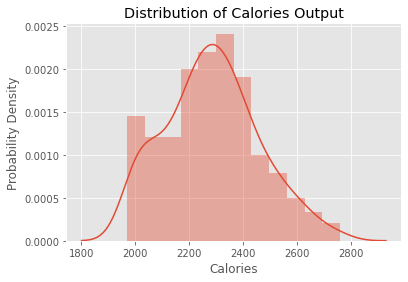

In [26]:
# Plot the distribution of RHR values
sns.distplot(df.Output)
plt.xlabel("Calories"), plt.ylabel("Probability Density"), plt.title('Distribution of calories output'), 
plt.show()

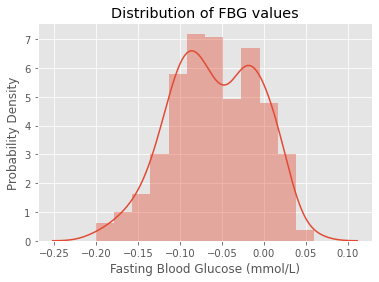

In [27]:
# Plot the distribution of RHR values
sns.distplot(df.Loss)
plt.xlabel("Fasting Blood Glucose (mmol/L)"), plt.ylabel("Probability Density"), plt.title('Distribution of FBG values'), 
plt.show()